# Capstone Project – The Battle of Neighborhoods (Week 5) - Finding a suitable neighborhood for opening new Asian Restaurant


**1.Scraping the Wikipedia page to obtain the table of postal codes of city of Toronto**

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
html_data = requests.get(url).text

In [3]:

soup = BeautifulSoup(html_data,"html5lib")

In [4]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

print(table_contents)

[{'PostalCode': 'M3A', 'Borough': 'North York', 'Neighborhood': 'Parkwoods'}, {'PostalCode': 'M4A', 'Borough': 'North York', 'Neighborhood': 'Victoria Village'}, {'PostalCode': 'M5A', 'Borough': 'Downtown Toronto', 'Neighborhood': 'Regent Park, Harbourfront'}, {'PostalCode': 'M6A', 'Borough': 'North York', 'Neighborhood': 'Lawrence Manor, Lawrence Heights'}, {'PostalCode': 'M7A', 'Borough': "Queen's Park", 'Neighborhood': 'Ontario Provincial Government'}, {'PostalCode': 'M9A', 'Borough': 'Etobicoke', 'Neighborhood': 'Islington Avenue'}, {'PostalCode': 'M1B', 'Borough': 'Scarborough', 'Neighborhood': 'Malvern, Rouge'}, {'PostalCode': 'M3B', 'Borough': 'North York', 'Neighborhood': 'Don Mills North'}, {'PostalCode': 'M4B', 'Borough': 'East York', 'Neighborhood': 'Parkview Hill, Woodbine Gardens'}, {'PostalCode': 'M5B', 'Borough': 'Downtown Toronto', 'Neighborhood': 'Garden District, Ryerson'}, {'PostalCode': 'M6B', 'Borough': 'North York', 'Neighborhood': 'Glencairn'}, {'PostalCode': 'M9

**Data From HTML table is extracted into Pandas dataframe**

In [5]:
toronto_data=pd.DataFrame(table_contents)
toronto_data.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [6]:
import geocoder
def get_geocode(postal_code):
    lat_long_coords = None
    while(lat_long_coords is None):
        g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
        lat_lng_coords = g.latlng
    latitude = lat_long_coords[0]
    longitude = lat_long_coords[1]
    return latitude,longitude

In [7]:
geo_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv')

In [8]:
geo_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


**Merge both the dataframes**

In [9]:
geo_df.rename(columns={'Postal Code':'PostalCode'},inplace=True)
geo_merged = pd.merge(geo_df, toronto_data, on='PostalCode')

In [10]:
geo_data=geo_merged[['PostalCode','Borough','Neighborhood','Latitude','Longitude']]

In [11]:
geo_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


**Explore and Cluster the neighborhoods in Toronto**

In [12]:
import numpy as np # library to handle data in a vectorized manner

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


**FourSquare API details**

In [13]:
CLIENT_ID = '4P4TJCVLZ5NLQNOEQGOAMJ2BUFLPKDWBSQVMWVNAQANPUXF3' # your Foursquare ID
CLIENT_SECRET = 'I0UOXH5EAIPGE4KBY0JWXOBPULXEO4V1PO4BEB35EEGCB4C4' # your Foursquare Secret
ACCESS_TOKEN = 'ZBOIIW4P2CRRPDM5PZDYATLNIBQT2FYDK5A25AIJ5WCXKZNC' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4P4TJCVLZ5NLQNOEQGOAMJ2BUFLPKDWBSQVMWVNAQANPUXF3
CLIENT_SECRET:I0UOXH5EAIPGE4KBY0JWXOBPULXEO4V1PO4BEB35EEGCB4C4


**Analyzing data with respect to neighborhoods**

In [14]:
def getNearbyVenuesDetails(borough, names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_detail_list=[]
    for brgh, name, lat, lng in zip(borough, names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_detail_list.append([(
            brgh,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues_list = pd.DataFrame([item for venue_detail_list in venues_detail_list for item in venue_detail_list])
    nearby_venues_list.columns = ['Borough', 'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues_list)

In [15]:
toronto_venues_list = getNearbyVenuesDetails(borough=geo_data['Borough'], names=geo_data['Neighborhood'],
                                   latitudes=geo_data['Latitude'],
                                   longitudes=geo_data['Longitude']
                                  )
toronto_venues_list

Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
York Mills, Silver Hills
Willowdale, Newtonbrook
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Don Mills South
Bathurst Manor, Wilson Heights, Downsview North
Northwood Park, York University
Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Parkview Hill, Woodbine Gardens
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
The Danforth  East
The Danforth West, Riverdale


,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Scarborough,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,Scarborough,"Malvern, Rouge",43.806686,-79.194353,Interprovincial Group,43.805630,-79.200378,Print Shop
2,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
3,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank
4,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store
5,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Sail Sushi,43.765951,-79.191275,Restaurant
6,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Big Bite Burrito,43.766299,-79.190720,Mexican Restaurant
7,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Enterprise Rent-A-Car,43.764076,-79.193406,Rental Car Location
8,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Krispy Kreme Doughnuts,43.767169,-79.189660,Donut Shop
9,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Woburn Medical Centre,43.766631,-79.192286,Medical Center


In [16]:
toronto_venues_list.shape

(2111, 8)

In [17]:
import matplotlib.pyplot as plt

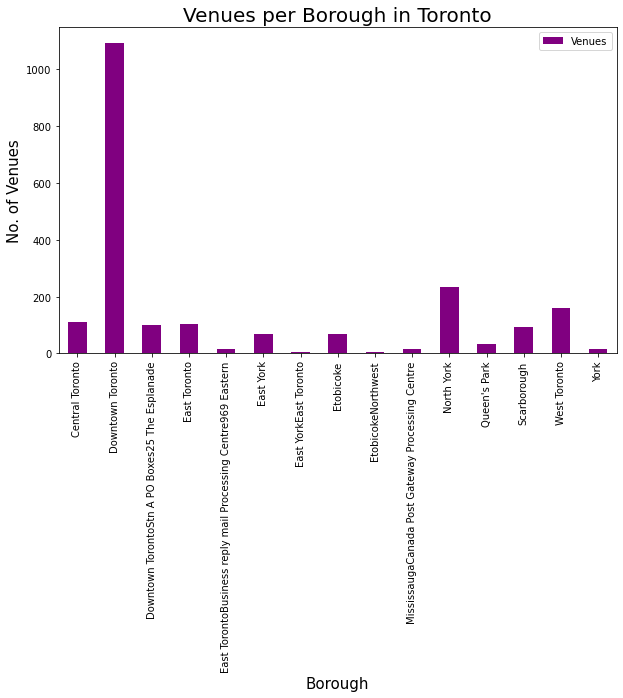

In [18]:
toronto_venues_list.groupby('Borough')['Venue Category'].count().plot.bar(figsize=(10,6), color='purple')
plt.title('Venues per Borough in Toronto', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. of Venues',fontsize = 15)
plt.legend(['Venues'])
plt.show()


In [19]:
restaurants_per_borough = toronto_venues_list[toronto_venues_list['Venue Category'].str.contains("Restaurant")]
restaurants_per_borough

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Scarborough,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
5,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Sail Sushi,43.765951,-79.191275,Restaurant
6,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Big Bite Burrito,43.766299,-79.190720,Mexican Restaurant
14,Scarborough,Woburn,43.770992,-79.216917,Korean Grill House,43.770812,-79.214502,Korean BBQ Restaurant
16,Scarborough,Cedarbrae,43.773136,-79.239476,Federick Restaurant,43.774697,-79.241142,Hakka Restaurant
17,Scarborough,Cedarbrae,43.773136,-79.239476,Drupati's Roti & Doubles,43.775222,-79.241678,Caribbean Restaurant
18,Scarborough,Cedarbrae,43.773136,-79.239476,Thai One On,43.774468,-79.241268,Thai Restaurant
44,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476,Vincent's Spot,43.717002,-79.242353,American Restaurant
50,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",43.757410,-79.273304,Kim Kim restaurant,43.753833,-79.276611,Chinese Restaurant
51,Scarborough,"Dorset Park, Wexford Heights, Scarborough Town...",43.757410,-79.273304,Kairali,43.754915,-79.276945,Indian Restaurant


In [20]:
restaurants_per_borough.groupby('Borough')['Venue Category'].count()

Borough
Central Toronto                                                  22
Downtown Toronto                                                255
Downtown TorontoStn A PO Boxes25 The Esplanade                   20
East Toronto                                                     29
East TorontoBusiness reply mail Processing Centre969 Eastern      2
East York                                                         7
Etobicoke                                                         9
MississaugaCanada Post Gateway Processing Centre                  3
North York                                                       55
Queen's Park                                                      7
Scarborough                                                      21
West Toronto                                                     40
York                                                              1
Name: Venue Category, dtype: int64

**Plot Number of Restaurants per Borough**

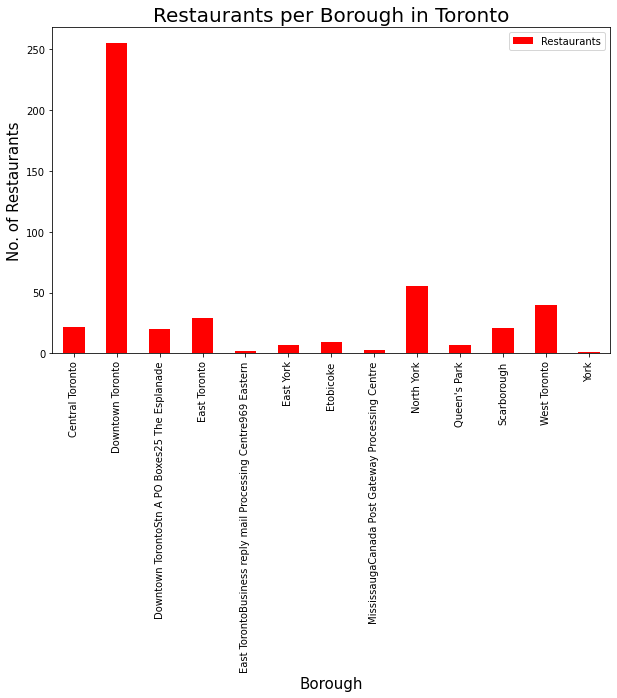

In [21]:
restaurants_per_borough.groupby('Borough')['Venue Category'].count().plot.bar(figsize=(10,6), color='red')
plt.title('Restaurants per Borough in Toronto', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. of Restaurants',fontsize = 15)
plt.legend(['Restaurants'])
plt.show()


In [22]:
restaurants_per_borough.groupby('Neighborhood')['Venue Category'].count()

Neighborhood
Agincourt                                                                                                         1
Bathurst Manor, Wilson Heights, Downsview North                                                                   3
Bayview Village                                                                                                   2
Bedford Park, Lawrence Manor East                                                                                11
Berczy Park                                                                                                      11
Brockton, Parkdale Village, Exhibition Place                                                                      2
Cedarbrae                                                                                                         3
Central Bay Street                                                                                               15
Christie                                                   

**Plot Number of Restaurants per Neighborhood**

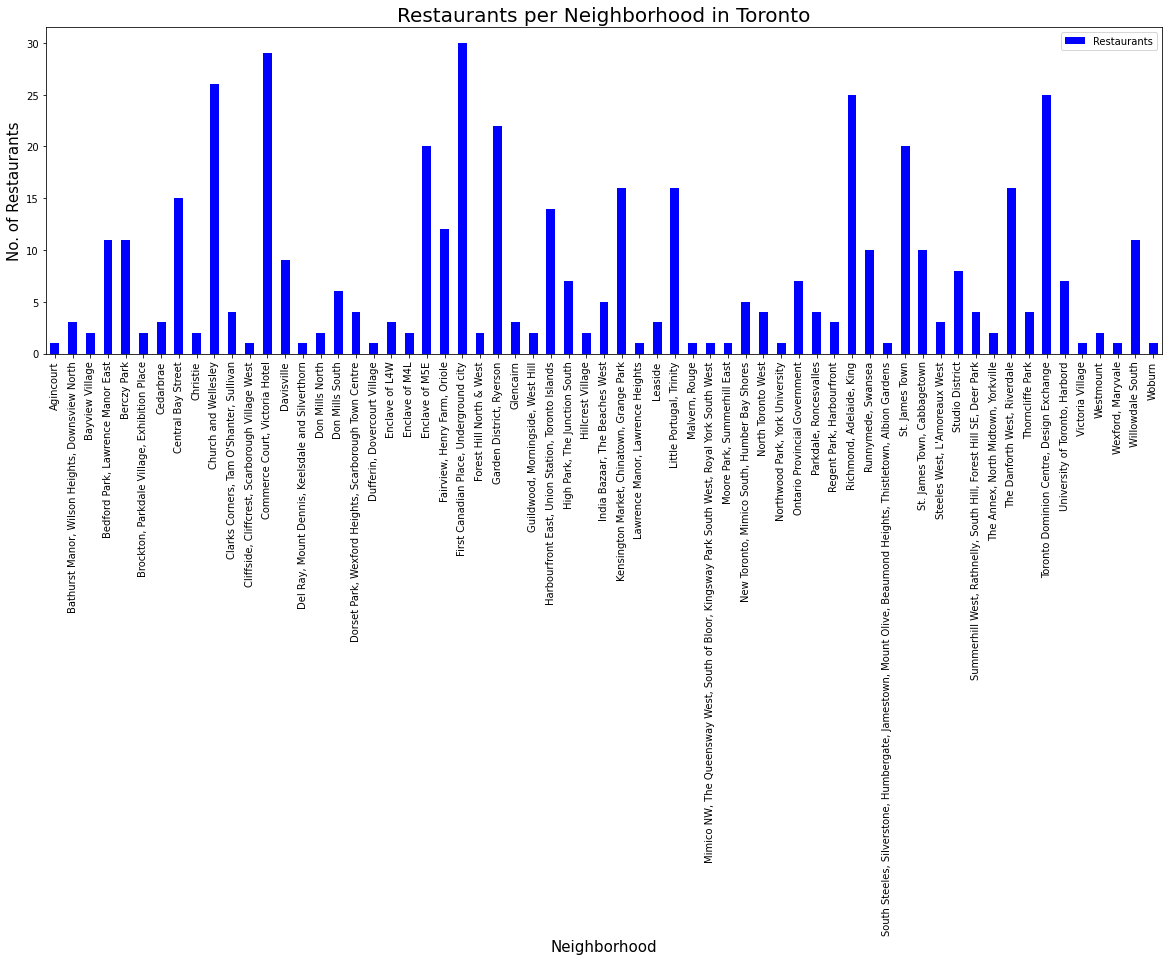

In [23]:
restaurants_per_borough.groupby('Neighborhood')['Venue Category'].count().plot.bar(figsize=(20,6), color='blue')
plt.title('Restaurants per Neighborhood in Toronto', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('No. of Restaurants',fontsize = 15)
plt.legend(['Restaurants'])
plt.show()

**Let's plot number of Asian Restaurants in each Borough**

In [24]:
asian_restaurants_per_borough = restaurants_per_borough[restaurants_per_borough['Venue Category'].str.contains("Asian Restaurant")]
asian_restaurants_per_borough

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
130,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,Spring Rolls,43.777351,-79.343977,Asian Restaurant
232,North York,Don Mills South,43.725900,-79.340923,Pho 88 發發餐廳,43.726642,-79.342345,Asian Restaurant
863,Downtown Toronto,St. James Town,43.651494,-79.375418,Sweet Lulu,43.650557,-79.381175,Asian Restaurant
1016,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,Bosk at Shangri-La,43.649023,-79.385826,Asian Restaurant
1242,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576,Bosk at Shangri-La,43.649023,-79.385826,Asian Restaurant
1273,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576,Sweet Lulu,43.650557,-79.381175,Asian Restaurant
1375,Downtown Toronto,"Commerce Court, Victoria Hotel",43.648198,-79.379817,Sweet Lulu,43.650557,-79.381175,Asian Restaurant
1693,Downtown Toronto,"First Canadian Place, Underground city",43.648429,-79.382280,Bosk at Shangri-La,43.649023,-79.385826,Asian Restaurant
1729,Downtown Toronto,"First Canadian Place, Underground city",43.648429,-79.382280,Sweet Lulu,43.650557,-79.381175,Asian Restaurant
1744,Downtown Toronto,"First Canadian Place, Underground city",43.648429,-79.382280,Noodle King,43.651706,-79.383046,Asian Restaurant


In [25]:
asian_restaurants_per_borough.groupby('Borough')['Venue Category'].count()

Borough
Downtown Toronto    8
North York          3
West Toronto        2
Name: Venue Category, dtype: int64

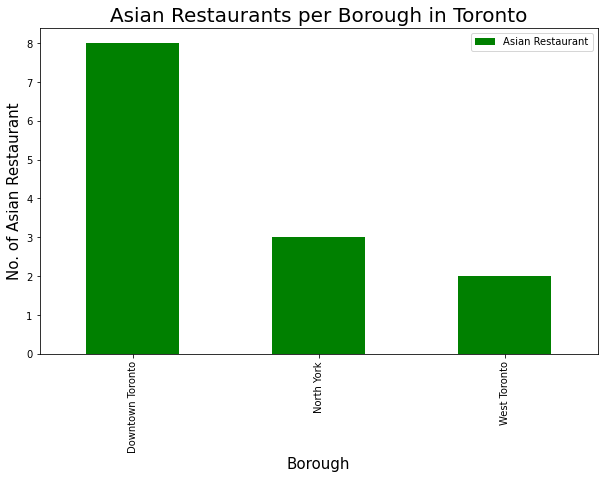

In [26]:
asian_restaurants_per_borough.groupby('Borough')['Venue Category'].count().plot.bar(figsize=(10,6), color='green')
plt.title('Asian Restaurants per Borough in Toronto', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. of Asian Restaurant',fontsize = 15)
plt.legend(['Asian Restaurant'])
plt.show()

In [27]:
asian_restaurants_per_borough.groupby('Neighborhood')['Venue Category'].count()

Neighborhood
Commerce Court, Victoria Hotel              1
Don Mills South                             1
Fairview, Henry Farm, Oriole                1
First Canadian Place, Underground city      3
Glencairn                                   1
Little Portugal, Trinity                    2
Richmond, Adelaide, King                    1
St. James Town                              1
Toronto Dominion Centre, Design Exchange    2
Name: Venue Category, dtype: int64

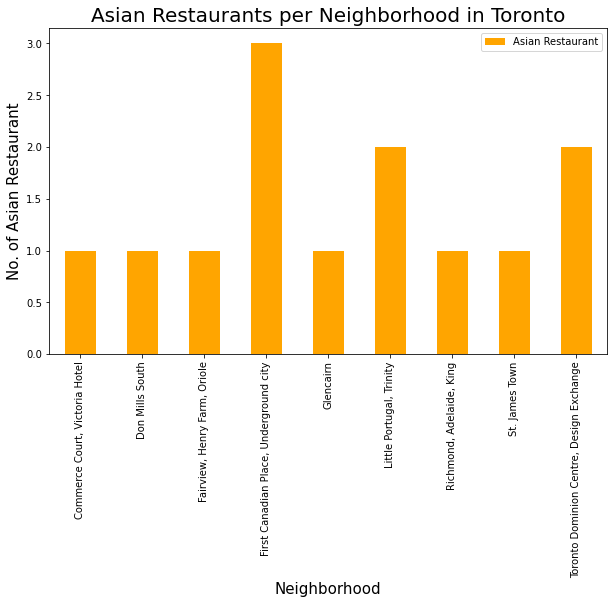

In [28]:
asian_restaurants_per_borough.groupby('Neighborhood')['Venue Category'].count().plot.bar(figsize=(10,6), color='orange')
plt.title('Asian Restaurants per Neighborhood in Toronto', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('No. of Asian Restaurant',fontsize = 15)
plt.legend(['Asian Restaurant'])
plt.show()

In [29]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


**Plot on Map all the Restaurants in neighborhood**

In [30]:
toronto_map = folium.Map(location = [latitude, longitude], zoom_start = 10)

# marker_cluster = folium.MarkerCluster("Neighborhood Cluster").add_to(toronto_map)

for idx,row in restaurants_per_borough.iterrows():
    folium.Marker(location = [row['Venue Latitude'], row['Venue Longitude']], 
                  popup=row['Neighborhood'],).add_to(toronto_map)
toronto_map

**Plot on Map only Asian Restaurants in neighborhood**

In [31]:
toronto_map = folium.Map(location = [latitude, longitude], zoom_start = 11)

for idx,row in asian_restaurants_per_borough.iterrows():
    folium.Marker(location = [row['Venue Latitude'], row['Venue Longitude']], 
                  popup=row['Neighborhood'],).add_to(toronto_map)
toronto_map

# Result/Conclusion

**In order to open a new Asian restaurant we performed analysis of data for Toronto and its neighborhood. Thus from the analysis we can conclude following results :**


**1. Number of Asian Restaurants at Downtown Toronto is the highest, thus we can assume that people staying in the Downtown Toronto enjoy eating Asian cuisine. So, taking the popularity into consideration Downtown Toronto is an ideal place to open a new Asian restaurant. 
In Downtowon Toronto borough, First Canadian Place, Underground city & Toronto Dominion Centre, Design Exchange have more number of Asian restaurants which is 3 & 2 respectively, while St. James Town, Richmond, Adelaide, King, Commerce Court, Victoria Hotel has only 1 Asain Restaurant.**


**2. While on the other hand West Toronto has least number of Asian restaurants. So opening a new Asian restaurant in West Toronto will provide people with another option to try Asian Cuisine and the restaurant opener need not worry about competition from its counter parts.
Little Portugal, Trinity is the only neighborhood in West Toronto with only 1 Asain Restaurant. 
Thus the entrepreneur can select any other neighborhood from West Toronto to open his new Asian Restaurant. 
Also, the remaining boroughs namely; Central Toronto, East Toronto, East York, Queen's Park, Etobicoke, York, Scarborough do not have any Asian Restaurants in their neighborhoods. So these are few other options where new Asain Restaurant can be opened.**
